<a href="https://colab.research.google.com/github/somilasthana/deeplearningtutorial/blob/master/Tensorflow_Belgian_Traffic_Signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from skimage import transform
from skimage import data
import matplotlib.pyplot as plt 
import os
import numpy as np
from skimage.color import rgb2gray
import random
import glob


In [1]:
!pwd

/content


In [0]:
!rm -rf /content/traffic_data

In [3]:
# Get Data
!mkdir traffic_data
%cd traffic_data

!wget https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip
!wget https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip
  
print("Done")

/content/traffic_data
--2019-06-13 01:17:10--  https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip
Resolving btsd.ethz.ch (btsd.ethz.ch)... 129.132.52.185, 2001:67c:10ec:36c2::b9
Connecting to btsd.ethz.ch (btsd.ethz.ch)|129.132.52.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174298785 (166M) [application/zip]
Saving to: ‘BelgiumTSC_Training.zip’

BelgiumTSC_Training 100%[===================>] 166.22M  8.23MB/s    in 21s     

2019-06-13 01:17:31 (8.04 MB/s) - ‘BelgiumTSC_Training.zip’ saved [174298785/174298785]

--2019-06-13 01:17:33--  https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip
Resolving btsd.ethz.ch (btsd.ethz.ch)... 129.132.52.185, 2001:67c:10ec:36c2::b9
Connecting to btsd.ethz.ch (btsd.ethz.ch)|129.132.52.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77877833 (74M) [application/zip]
Saving to: ‘BelgiumTSC_Testing.zip’

BelgiumTSC_Testing. 100%[===================>]  74.27M  8.29

In [0]:
!unzip /content/traffic_data/BelgiumTSC_Testing.zip

In [0]:
!unzip /content/traffic_data/BelgiumTSC_Training.zip

In [0]:
training_files = (glob.glob("/content/traffic_data/Training/*/*.ppm"))

In [21]:
training_files[0]

'/content/traffic_data/Training/00060/01877_00000.ppm'

In [0]:
testing_files = (glob.glob("/content/traffic_data/Testing/*/*.ppm"))

In [22]:
testing_files[0]

'/content/traffic_data/Testing/00060/02066_00002.ppm'

In [0]:
def load_data(file_names):
  labels = []
  images = []
  
  for f in file_names:
    f = f.strip()
    images.append(data.imread(f))
    words = f.split("/") # Not so great to extract labels
    labels.append(int(words[4]))
    
  return images, labels

In [0]:
images, labels = load_data(training_files)

In [0]:
images_array = np.array(images)
labels_array = np.array(labels)

In [46]:
images_array.shape, labels_array.shape

((4575,), (4575,))

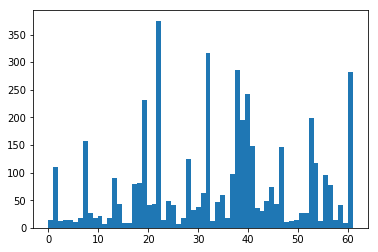

In [48]:
plt.hist(labels, 62)
plt.show()

shape: (60, 62, 3), min: 11, max: 255
shape: (96, 49, 3), min: 15, max: 212
shape: (100, 103, 3), min: 21, max: 255
shape: (131, 121, 3), min: 1, max: 255


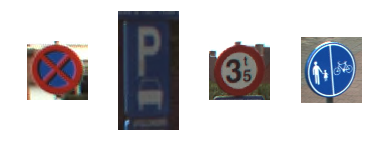

In [50]:
traffic_signs = [100, 200, 400, 800]

for i,index in enumerate(traffic_signs):
  plt.subplot(1, 4, i+1)
  plt.axis('off')
  plt.imshow(images[index])
  plt.subplots_adjust(wspace=0.5)
  print("shape: {0}, min: {1}, max: {2}".format(images[index].shape, 
                                                  images[index].min(), 
                                                  images[index].max()))
plt.show()

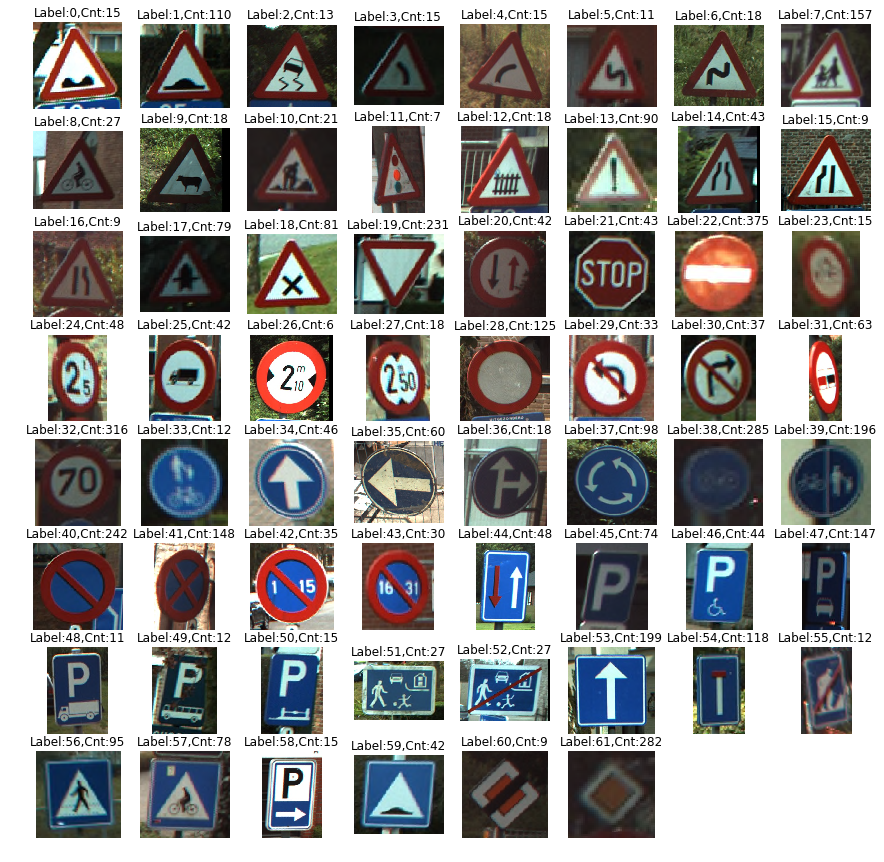

In [57]:
unique_labels = set(labels)
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for l in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(l)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label:{0},Cnt:{1}".format(l, labels.count(l)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [0]:
# Rescaling
images32 = [ transform.resize(image, (28, 28)) for image in images]
images32 = np.array(images32)

In [58]:
images32.shape

(4575, 28, 28, 3)

In [59]:
traffic_signs = [100, 200, 400, 800]

for i,index in enumerate(traffic_signs):
  print("shape: {0}, min: {1}, max: {2}".format(images32[index].shape, 
                                                  images32[index].min(), 
                                                  images32[index].max()))


shape: (28, 28, 3), min: 0.05616246498599484, max: 0.996078431372549
shape: (28, 28, 3), min: 0.07549019607843133, max: 0.6100490196078459
shape: (28, 28, 3), min: 0.10565226090436174, max: 1.0
shape: (28, 28, 3), min: 0.06888630452180888, max: 0.9763442877150856


In [0]:
images32 = rgb2gray(images32)

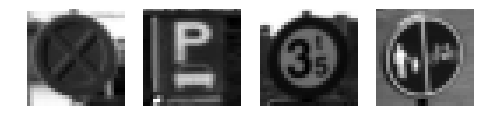

In [92]:
traffic_signs = [100, 200, 400, 800]
plt.figure(figsize=(8, 8))
for i,index in enumerate(traffic_signs):
  plt.subplot(2, 4, i+1)
  plt.axis('off')
  plt.imshow(images[index])
  #plt.subplots_adjust(wspace=0.5)
  
  plt.imshow(images32[index], cmap="gray")
  #plt.subplots_adjust(wspace=0.5)
plt.show()

In [0]:
# Model Building
x = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28])
y = tf.placeholder(dtype=tf.int32, shape=[None] )

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits))
train_ops = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [100]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten_2/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected_2/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean_3:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax_1:0", shape=(?,), dtype=int64)


In [101]:
tf.set_random_seed(42)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(20):
    _, loss_value = sess.run(
        [
            train_ops,loss
        ],
        feed_dict={x: images32, y: labels}
    )
    
    if i % 10 == 0:
      print("Loss ", loss)
      
   #Evaluating

  sample_indexes = random.sample(range(len(images32)), 10)
  sample_images = [images32[i] for i in sample_indexes]
  sample_labels = [labels[i] for i in sample_indexes]
  predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
  
    
print(sample_labels)
print(predicted)

Loss  Tensor("Mean_3:0", shape=(), dtype=float32)
Loss  Tensor("Mean_3:0", shape=(), dtype=float32)
[22, 32, 45, 32, 39, 21, 19, 22, 17, 32]
[22 32 38 32 22 53 22 22 22 32]


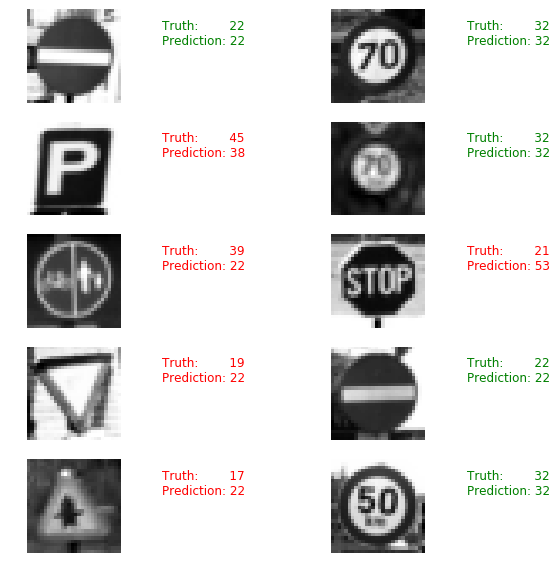

In [102]:
fig = plt.figure(figsize=(10, 10))
for i, y_pred in enumerate(zip(sample_labels,predicted )):
  truth = y_pred[0]
  predict = y_pred[1]
  
  plt.subplot(5, 2, 1+i)
  plt.axis('off')
  color='green' if truth == predict else 'red'
  plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, predict), fontsize=12, color=color)
  plt.imshow(sample_images[i], cmap='gray')
plt.show()